In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing = pd.read_csv('../../__DATA__/melbourne-housing-market/Melbourne_housing_FULL.csv')
display(housing.head())
print(housing.columns)
print(housing.shape)

housing.isna().sum()

### Preliminary Notes; Brainstorming
- Bedrooms: Aggregate an average between the two columns
- Prices: Remove the data points where price is missing, since this is supervised learning and that's the exact varable that we're trying to predict.
- Distance: Fill manually based on suburb; Fill based on KNN or look at other suburbs (Datawig sounds best; allows imputation of target variable based on specified variables.
- Postcode: Fill manually based on suburb. Or Datawig or KNN
- Region Name: Datawig or KNN
- Property Count: Datawig or KNN
- Council Area: KNN or Datawig
- Bathroom
- Car
- Landsize
- Building Area
- Year Built: 



In [4]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

NoneType

In [17]:
for col in housing.columns:
    if type(housing.copy().dropna(axis=0, how='any').reset_index()[col][0]) == str:
        print('{} column has {} unique categories.'.format(col, housing[col].nunique()))

Suburb column has 351 unique categories.
Address column has 34009 unique categories.
Type column has 3 unique categories.
Method column has 9 unique categories.
SellerG column has 388 unique categories.
Date column has 78 unique categories.
CouncilArea column has 33 unique categories.
Regionname column has 8 unique categories.


{'whiskers': [<matplotlib.lines.Line2D at 0x14f923c50>,
 'caps': [<matplotlib.lines.Line2D at 0x14f5ca710>,
 'boxes': [<matplotlib.lines.Line2D at 0x14f092850>],
 'medians': [<matplotlib.lines.Line2D at 0x14e4058d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14f092710>],
 'means': []}

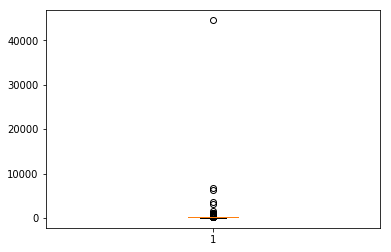

### Potential Feature Engineering Ideas:
(For if or when they come to me)
- Bedroom Average

In [18]:
housing.skew()

Rooms             0.499097
Price             2.588969
Distance          1.503586
Postcode          4.018786
Bedroom2          1.406366
Bathroom          1.356293
Car               2.095176
Landsize         96.022311
BuildingArea     99.132579
YearBuilt        -1.080913
Lattitude        -0.257661
Longtitude       -0.394880
Propertycount     0.992100
dtype: float64

Notes: 

- Despite the fact that binarizing the categorical variables will drastically increase the feature dimensions, I do not want to use dimension reduction so that I can easily interpret the coefficents that regression produces.
- Creating pipelines for imputation, preprocessing, 
- Revisit the assumptions for linear regression to work. After messing with interpretable linear regression to a full
- Note that the test set must always be PCA transformed based on a PCA fitting of it's corresponding train set

Mapping Out Workflow:
1. Impute smaller set of missing values manually using KNN. Or if that's too complicated I can just drop those values from the data set as a whole. Also drop all missing price rows.
2. Impute rest of variable using datawig neural network imputer; do not impute based on prices ever. Autoimpute Actually with a Stochastic Strategy
3. Check for normality and linear regression requirements. Normalize column distributions as necessary, including the price. And yes, it's okay for test and train data to be transformed seperately, rather than together, transformation functions are not dependent on the variables they transform, either works. Also consider any multicollinearity at this stage.
4. Create imputation and Preprocessing Funcations functions for the purpose of implementing in a pipeline.
5. Fit, Test, and Crossvalidate Models
6. If using linear regression without regularization, analyze regressed coefficients, and check for normality and homoscedasticity of the errors.

### Pre-Pipeline Cleaning
Before the dataset is set for pipelining through train and test set processing, some missing values need to be removed. Any row without a price will be removed since we are trying to train the model on that specific label.

In [19]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [21]:
# Removing rows with missing values from select columns
rows_to_drop = ['Price', 'Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount']
housing = housing.dropna(how='any', subset = rows_to_drop)
print(housing.isna().sum())
housing.shape

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6438
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
dtype: int64


(27244, 21)

In [73]:
# Changing postal code to a categorical dtype of object/string
housing['Postcode'] = pd.to_numeric(housing['Postcode']).astype(int).astype(str)
housing.dtypes

Suburb            object
Address           object
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode          object
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
room_avg         float64
dtype: object

In [76]:
# Changing date column into appropriate, useable data type for regression
import datetime as dt
housing['Date'] = pd.to_datetime(housing['Date'])
housing['Date'] = housing['Date'].map(dt.datetime.toordinal)
display(housing.head())
housing.dtypes

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,room_avg
1,Abbotsford,85 Turner St,h,1480000.0,S,Biggin,736035,2.5,3067,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2.0
2,Abbotsford,25 Bloomburg St,h,1035000.0,S,Biggin,736056,2.5,3067,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2.0
4,Abbotsford,5 Charles St,h,1465000.0,SP,Biggin,736422,2.5,3067,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,3.0
5,Abbotsford,40 Federation La,h,850000.0,PI,Biggin,736422,2.5,3067,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,3.0
6,Abbotsford,55a Park St,h,1600000.0,VB,Nelson,736060,2.5,3067,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,3.5


Suburb            object
Address           object
Type              object
Price            float64
Method            object
SellerG           object
Date               int64
Distance         float64
Postcode          object
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
room_avg         float64
dtype: object

### Finding and eliminating outliers

In [77]:
housing.select_dtypes(np.number).head()

,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,room_avg
1,1480000.0,736035,2.5,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0,2.0
2,1035000.0,736056,2.5,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,2.0
4,1465000.0,736422,2.5,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,3.0
5,850000.0,736422,2.5,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0,3.0
6,1600000.0,736060,2.5,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,3.5


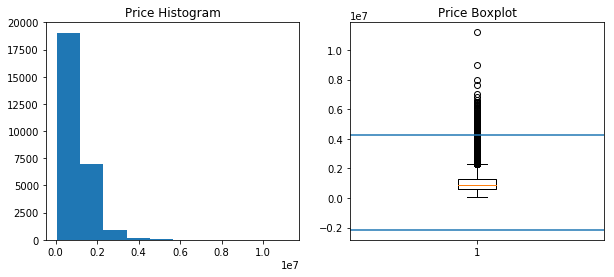

Outliers:  112


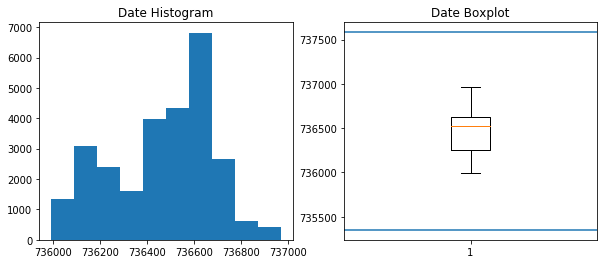

Outliers:  0


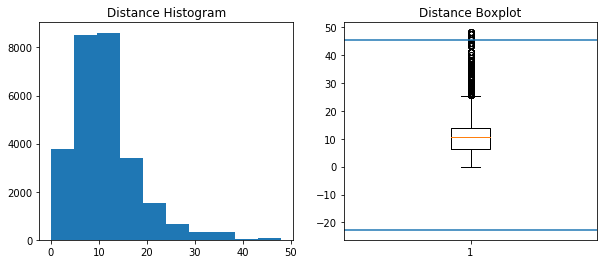

Outliers:  54


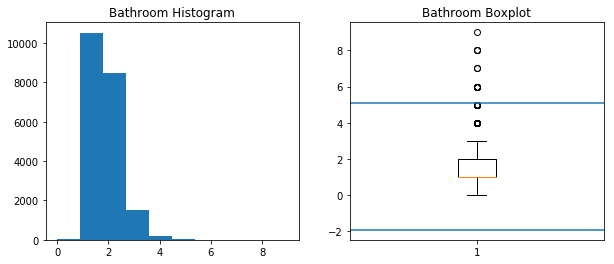

Outliers:  16


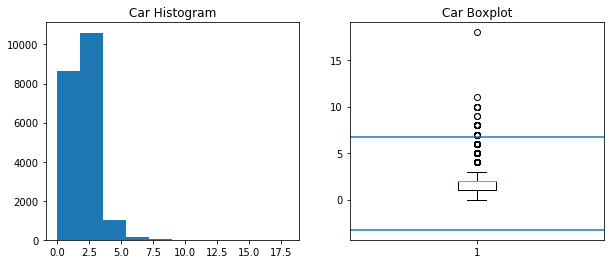

Outliers:  46


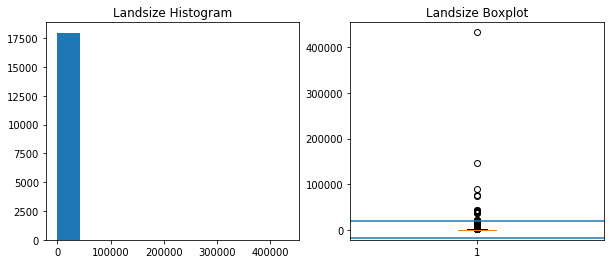

Outliers:  19


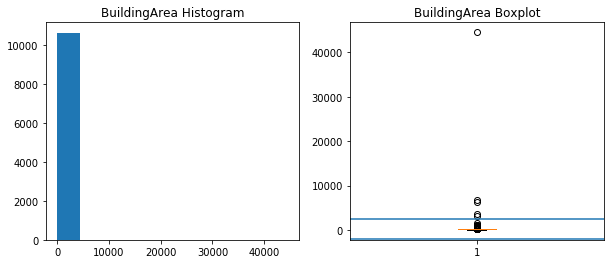

Outliers:  5


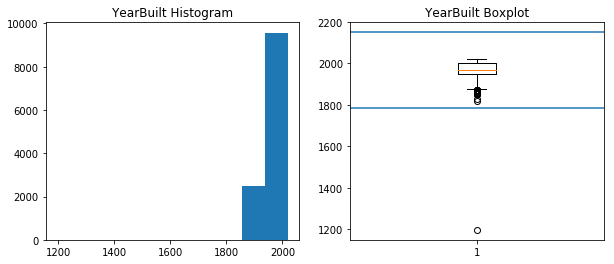

Outliers:  1


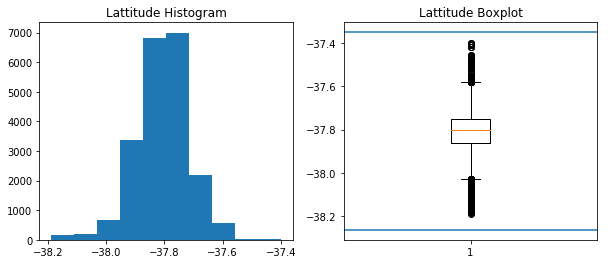

Outliers:  0


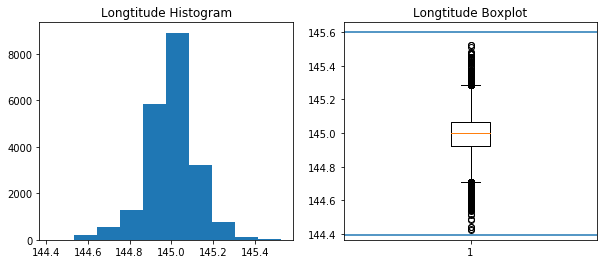

Outliers:  0


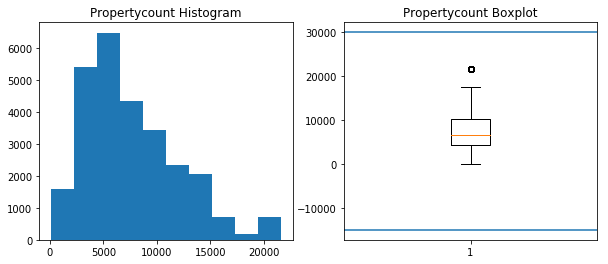

Outliers:  0


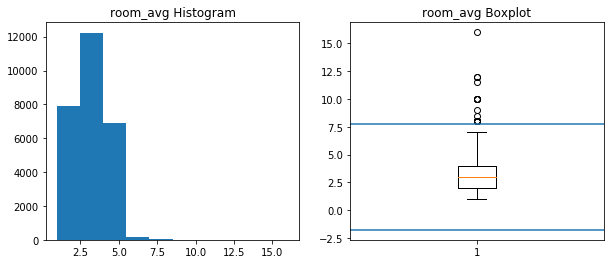

Outliers:  21


In [87]:
num_cols = housing.select_dtypes(np.number).columns
z = 5
for col in num_cols:
    upper_thresh = housing[col].mean() + housing[col].std()*z
    lower_thresh = housing[col].mean() - housing[col].std()*z
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.hist(housing[col].dropna())
    plt.title(col + ' Histogram')
    plt.subplot(1,2,2)
    plt.boxplot(housing[col].dropna())
    plt.title(col + ' Boxplot')
    plt.axhline(upper_thresh)
    plt.axhline(lower_thresh)
    plt.show()
    
    z_scores = (housing[col] - housing[col].mean())/housing[col].std()
    print('Outliers: ',(np.absolute(z_scores) > z).sum())

In [106]:
# removing outliers from the data frame
from scipy import stats
numeric_df = housing.select_dtypes(np.number)
z_threshed_index = ~np.any(np.absolute(stats.zscore(numeric_df)) > 5, axis = 1)
housing_threshed = housing.copy().loc[z_threshed_index]
display(housing_threshed.head())
housing_threshed.shape

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,room_avg
1,Abbotsford,85 Turner St,h,1480000.0,S,Biggin,736035,2.5,3067,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2.0
2,Abbotsford,25 Bloomburg St,h,1035000.0,S,Biggin,736056,2.5,3067,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2.0
4,Abbotsford,5 Charles St,h,1465000.0,SP,Biggin,736422,2.5,3067,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,3.0
5,Abbotsford,40 Federation La,h,850000.0,PI,Biggin,736422,2.5,3067,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,3.0
6,Abbotsford,55a Park St,h,1600000.0,VB,Nelson,736060,2.5,3067,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,3.5


(27059, 20)

In [124]:
housing_threshed.skew()

Price              1.708007
Date              -0.220916
Distance           1.329769
Bathroom           1.117528
Car                1.639245
Landsize         105.066477
BuildingArea      25.494495
YearBuilt         -1.325249
Lattitude         -0.377562
Longtitude        -0.342991
Propertycount      1.017914
room_avg           0.229467
dtype: float64

### Imputing the data using Autoimputer

In [28]:
housing_test = housing.copy().dropna(axis = 0, subset = ['Bedroom2'])
counter = 0
for i in housing_test.index:
    if housing_test.loc[i,'Rooms'] != housing_test.loc[i,'Bedroom2']:
        counter += 1
counter

721

In [33]:
sse = 0
for i in housing_test.index:
    sse += (housing_test.loc[i,'Rooms'] - housing_test.loc[i,'Bedroom2'])**2
np.sqrt(sse)

39.44616584663204

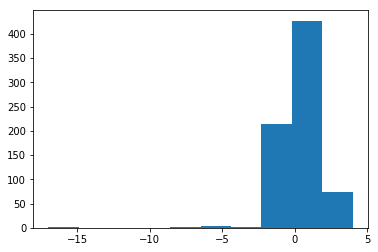

In [44]:
diffs = []
for i in housing_test.index:
    diff = housing_test.loc[i,'Rooms'] - housing_test.loc[i,'Bedroom2']
    if (diff != 0):
        diffs.append(diff)
plt.figure()
plt.hist(diffs)
plt.show()

In [45]:
# How many values lie below -4 for bedrooms
i = 0
for diff in diffs:
    if diff < -4:
        i += 1
i

5

Given that most of the Bedroom data has a discrepancy of absolute value of 1 between the two sources of bedroom number data, we will take the average of the bedroom data, and use that as our final bedroom data.

In [48]:
housing['Bedroom2'].fillna(0)
housing['room_avg'] = housing[['Rooms', 'Bedroom2']].mean(axis=1)
print(housing.isna().sum())
housing.columns

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6438
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
room_avg             0
dtype: int64


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'room_avg'],
      dtype='object')

In [148]:
housing_threshed.skew()

Price              1.708007
Date              -0.220916
Distance           1.329769
Bathroom           1.117528
Car                1.639245
Landsize         105.066477
BuildingArea      25.494495
YearBuilt         -1.325249
Lattitude         -0.377562
Longtitude        -0.342991
Propertycount      1.017914
room_avg           0.229467
dtype: float64

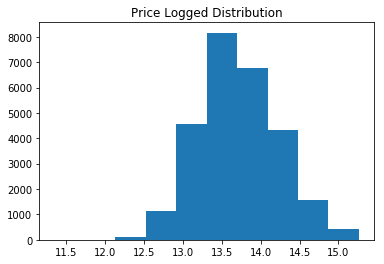

Price Logged Skew: 0.22834031364800664


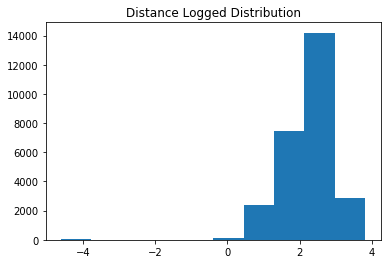

Distance Logged Skew: -2.3197563715628724


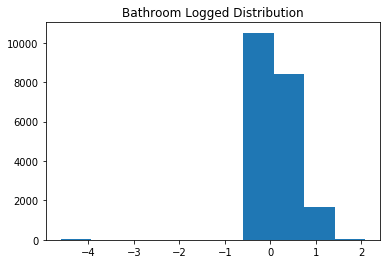

Bathroom Logged Skew: -1.9333530806278563


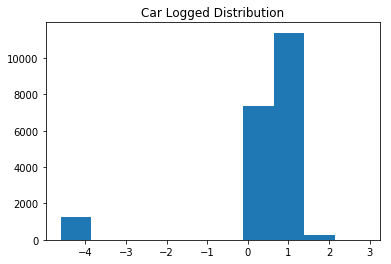

Car Logged Skew: -2.985692780237842


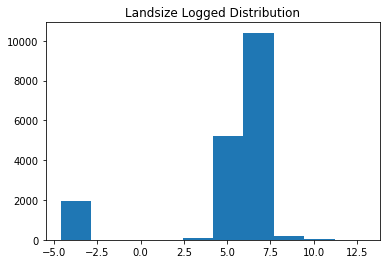

Landsize Logged Skew: -2.335865378937462


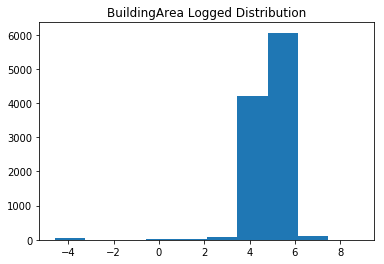

BuildingArea Logged Skew: -6.407222637072737


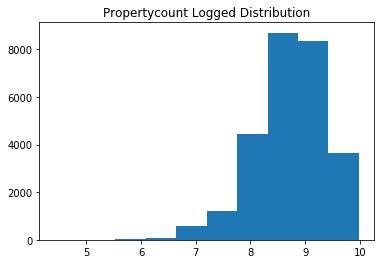

Propertycount Logged Skew: -0.6758479397413947


In [160]:
cols_to_log = ['Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']
for col in cols_to_log:
    logged_dist = np.log(housing_threshed[col]+.01)
    plt.figure()
    plt.hist(logged_dist)
    plt.title(col + ' Logged Distribution')
    plt.show()
    print(col + ' Logged Skew: {}'.format(logged_dist.skew()))
#plt.hist(np.log(housing_threshed['Landsize']+1))
#housing_threshed[housing_threshed['Landsize'] == 0]
#housing_threshed[housing_threshed['Landsize'] > 1000].count()
#housing_threshed.loc[housing_threshed['Landsize'] == 0]

Absolute value of skew decreased for all after taking the logarithm.

Logged Columns:
'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount'

In [159]:
housing_gauss = housing_threshed.copy()
cols_to_log = ['Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']
for col in cols_to_log:
    housing_gauss[col] = np.log(housing_threshed[col] + 1)
housing_gauss[cols_to_log].skew()
    

Price            0.228342
Distance        -0.433404
Bathroom         0.473566
Car             -0.431941
Landsize        -2.020822
BuildingArea    -2.907631
Propertycount   -0.675067
dtype: float64

### Pipeline Imputing

In [107]:
housing_df = housing_threshed.copy()

In [49]:
# removing Rooms and Bedroom2 columns
housing = housing[['Suburb', 'Address', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'room_avg']]

In [109]:
from autoimpute.imputations import MultipleImputer

strategies = {'Lattitude':'pmm', 'Longitude':'pmm', 'Bathroom':'pmm', 'Car':'pmm',
              'Landsize':'stochastic', 'BuildingArea':'stochastic', 'YearBuilt':'stochastic' }
predictors = {'Lattitude':['Suburb','Postcode','Distance', 'Regionname'],
              'Longitude':['Suburb','Postcode','Distance', 'Regionname'],
              'Bathroom':['room_avg','BuildingArea', 'Suburb','Postcode', 'Landsize','Type','Distance'],
              'Car':['room_avg','BuildingArea', 'Suburb','Postcode', 'Landsize','Type','Distance'],
              'Landsize':['Type','room_avg','BuildingArea', 'Suburb','Postcode','Car','Bathroom','Distance'],
              'BuildingArea':['Type','room_avg','Landsize', 'Suburb','Postcode','Car','Bathroom','Distance'],
              'YearBuilt':['Suburb','Regionname','CouncilArea','Latitude','Longitude']}
imp_args = {'pmm':{'neighbors': 10}, 'stochastic':{'normalize': True}}

imputer = MultipleImputer(n=10, strategy = strategies, predictors = predictors, imp_kwgs = imp_args,
                         visit = 'default')

----------------
# Let's Start Over and Do This Cleaning Thing One More Time

Although the order may depend on the dataset in question, data cleaning should be done in the following order to prevent data leakage between the train and test sets, to optimize the flow of data through a pipeline for cross-validation, and to ensure that outlier management and skewed distributions are handled appropriately.

The Process:
1. Eliminate rows with missing values if possible or unnecessary
2. Engineer new features
3. Normalize Column Distributions
4. Eliminate Rows Containing Outliers (Or Winsorize)
5. Train/Test Split --- MODEL PIPELINE BEGINS ---
6. Impute using autoimpute API

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and summarizing the raw data set
housing_raw = pd.read_csv('../../__DATA__/melbourne-housing-market/Melbourne_housing_FULL.csv')
display(housing_raw.head())
print(housing_raw.columns)
print(housing_raw.shape)
housing_raw.isna().sum()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
(34857, 21)


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [2]:
for col in housing_raw.select_dtypes(np.number).columns:
    print('{} column has {} unique categories.'.format(col, housing_raw[col].nunique()))

Rooms column has 12 unique categories.
Price column has 2871 unique categories.
Distance column has 215 unique categories.
Postcode column has 211 unique categories.
Bedroom2 column has 15 unique categories.
Bathroom column has 11 unique categories.
Car column has 15 unique categories.
Landsize column has 1684 unique categories.
BuildingArea column has 740 unique categories.
YearBuilt column has 160 unique categories.
Lattitude column has 13402 unique categories.
Longtitude column has 14524 unique categories.
Propertycount column has 342 unique categories.


### Initial Pruning and Feature Tuning

In [3]:
housing_pruned = housing_raw.copy()

# Change Postal Code to String Datatype
housing_pruned['Postcode'] = housing_raw['Postcode'].astype(int, errors = 'ignore').astype(str, errors = 'ignore')

# Change Date from string to Ordinal date integer
import datetime as dt
housing_pruned['Date'] = pd.to_datetime(housing_raw['Date'])
housing_pruned['Date'] = housing_pruned['Date'].map(dt.datetime.toordinal)
    
# Average the two bedroom listings
housing_pruned['room_avg'] = housing_raw[['Rooms', 'Bedroom2']].mean(axis=1)
housing_pruned = housing_pruned.drop(columns = ['Rooms','Bedroom2'])

# Discard any individual datapoints that do not list a price, and other subsets of N/A values that can easily be discarded
# Missing prices are discarded because that is our target variable. Other categories are being stripped on N/A because they are small enough samples to discard
rows_to_drop = ['Price', 'Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount']
housing_pruned = housing_pruned.dropna(how='any', subset = rows_to_drop)

# List the columns
print(housing_pruned.shape)
housing_pruned.isna().sum()

(27244, 20)


Suburb               0
Address              0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6444
Car               6821
Landsize          9262
BuildingArea     16588
YearBuilt        15160
CouncilArea          0
Lattitude         6251
Longtitude        6251
Regionname           0
Propertycount        0
room_avg             0
dtype: int64

### Normalizing Column Distributions

In [4]:
housing_pruned.skew()

Price             2.588797
Date             -0.222986
Distance          1.478676
Bathroom          1.284930
Car               1.639197
Landsize         90.442620
BuildingArea     90.993694
YearBuilt        -1.316290
Lattitude        -0.321994
Longtitude       -0.351165
Propertycount     1.015455
room_avg          0.535417
dtype: float64

Although this is a subjective rule of thumb, any column - including the target - with a skew value greater than 1 will be log transformed. (Although we will ignore the YearBuilt for the sake simplifying the normalization process.)

This is important to prepare the dataset for regression and as an initial step to identify and remove outliers.

In [5]:
housing_gauss = housing_pruned.copy()
cols_to_log = ['Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']
for col in cols_to_log:
    housing_gauss[col] = np.log(housing_pruned[col] + 1)
housing_gauss[cols_to_log].skew()

Price            0.335768
Distance        -0.400508
Bathroom         0.508660
Car             -0.425305
Landsize        -2.013727
BuildingArea    -2.788141
Propertycount   -0.693419
dtype: float64

Adding 1 before log transforming the columns ensures that there are no zero values being logged. Also 1 was chose, as opposed to 0.01 and 0.1, because it reduces the absolute skew values the most.

### Detecting and Stripping Outliers

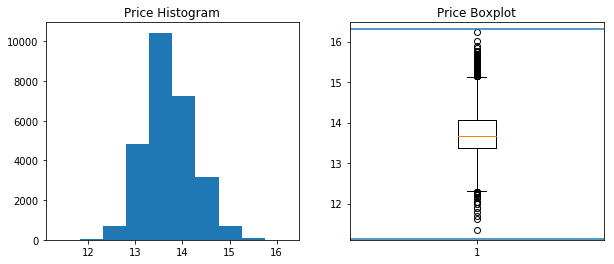

Outliers:  0


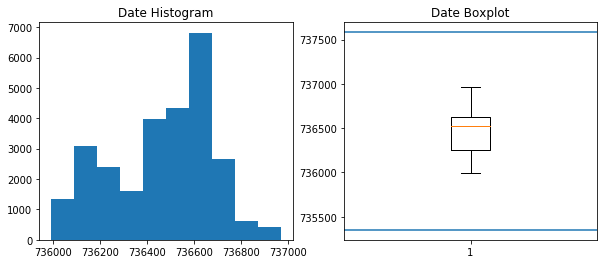

Outliers:  0


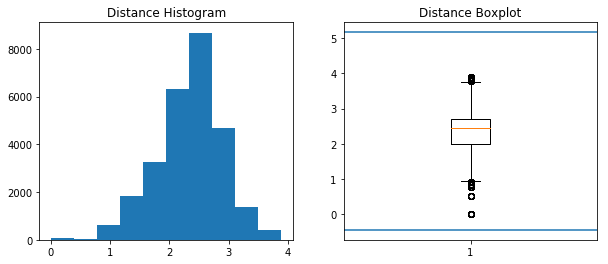

Outliers:  0


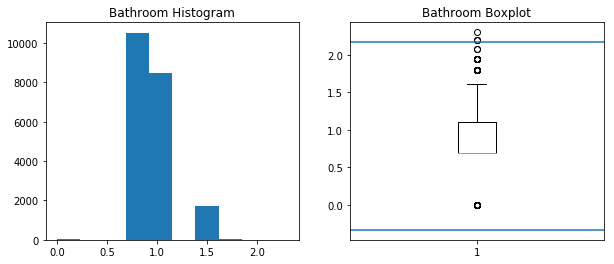

Outliers:  4


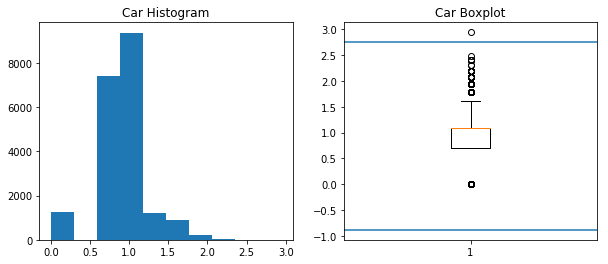

Outliers:  1


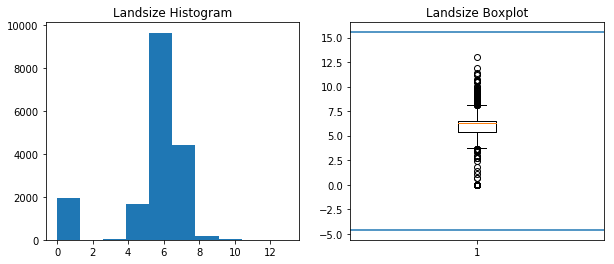

Outliers:  0


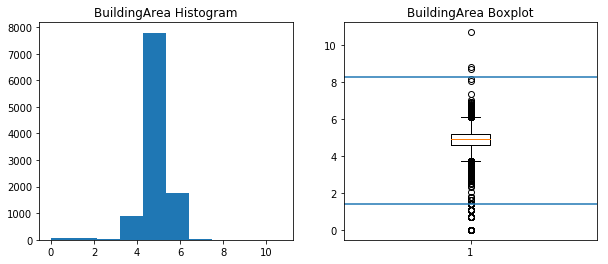

Outliers:  118


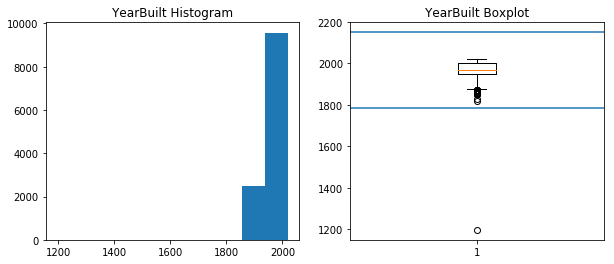

Outliers:  1


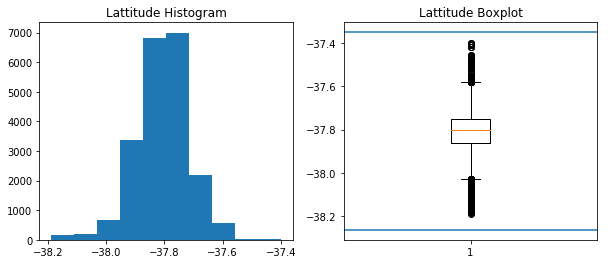

Outliers:  0


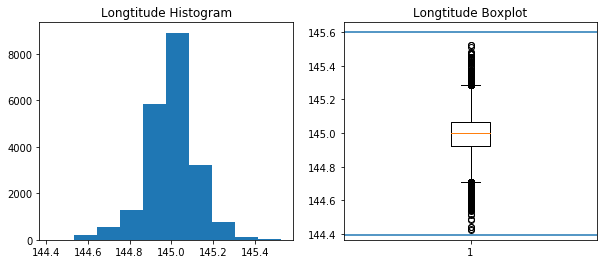

Outliers:  0


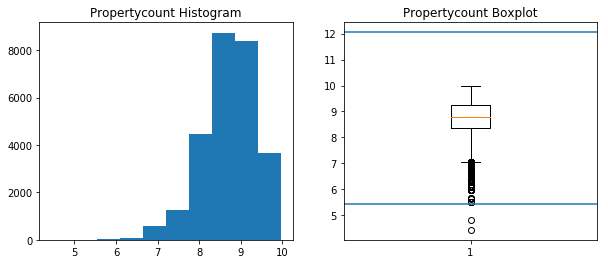

Outliers:  2


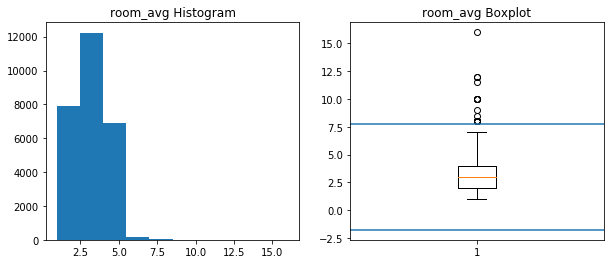

Outliers:  21


In [6]:
num_cols = housing_gauss.select_dtypes(np.number).columns
z = 5
for col in num_cols:
    upper_thresh = housing_gauss[col].mean() + housing_gauss[col].std()*z
    lower_thresh = housing_gauss[col].mean() - housing_gauss[col].std()*z
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.hist(housing_gauss[col].dropna())
    plt.title(col + ' Histogram')
    plt.subplot(1,2,2)
    plt.boxplot(housing_gauss[col].dropna())
    plt.title(col + ' Boxplot')
    plt.axhline(upper_thresh)
    plt.axhline(lower_thresh)
    plt.show()
    
    z_scores = (housing_gauss[col] - housing_gauss[col].mean())/housing_gauss[col].std()
    print('Outliers: ',(np.absolute(z_scores) > z).sum())

Being extremely conservative, all numerical features will be stripped of their outliers defined as having a z-score above 5. However, because the BuildingArea columns exhibits a high number a outliers at this score, its outliers will be defined as having a score above z=6.

In [7]:
# removing outliers from the data frame

# computing z_scores
numeric_df = housing_gauss.copy().select_dtypes(np.number)
z_scores = (numeric_df - numeric_df.mean())/numeric_df.std()

# indexing all values of abs(z) <= 5 as true, or abs(z) <= 6 for building area
z_index_1 = ~np.any(np.absolute(z_scores.drop(columns = 'BuildingArea')) > 5, axis = 1)
z_index_2 = ~(np.absolute(z_scores['BuildingArea']) > 6)
z_index = (z_index_1 & z_index_2)

housing_threshed = housing_gauss.copy().loc[z_index]
housing_threshed.shape

(27142, 20)

### Testing AutoImputer, Fancy Imputer, Impyute

In [8]:
from autoimpute.imputations import SingleImputer

strategies = {'Lattitude':'pmm', 'Longtitude':'pmm', 'Bathroom':'pmm', 'Car':'pmm',
              'Landsize':'stochastic', 'BuildingArea':'stochastic', 'YearBuilt':'stochastic' }
predictors = {'Lattitude':['Suburb','Postcode','Distance', 'Regionname'],
              'Longtitude':['Suburb','Postcode','Distance', 'Regionname'],
              'Bathroom':['room_avg','BuildingArea', 'Suburb','Postcode', 'Landsize','Type','Distance'],
              'Car':['room_avg','BuildingArea', 'Suburb','Postcode', 'Landsize','Type','Distance'],
              'Landsize':['Type','room_avg','BuildingArea', 'Suburb','Postcode','Car','Bathroom','Distance'],
              'BuildingArea':['Type','room_avg','Landsize', 'Suburb','Postcode','Car','Bathroom','Distance'],
              'YearBuilt':['Suburb','Regionname','CouncilArea','Lattitude','Longtitude']}
imp_args = {'pmm':{'neighbors': 5}, 'stochastic':{'normalize': True}}

imputer = SingleImputer(strategy = strategies, predictors = predictors, #imp_kwgs = imp_args,
                         visit = 'default', copy=True)

In [9]:
# imputer.fit_transform(housing_threshed)

In [28]:
print(X_incomplete.shape)
X_incomplete = housing_threshed.select_dtypes(np.number)
X_incomplete = X_incomplete.drop(columns = 'Price')
X_incomplete.head()

(27142, 18)


,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,room_avg
1,736035,1.252763,0.693147,0.693147,5.313206,NaN,NaN,-37.7996,144.9984,8.299037,2.0
2,736056,1.252763,0.693147,0.000000,5.056246,4.382027,1900.0,-37.8079,144.9934,8.299037,2.0
4,736422,1.252763,1.098612,0.000000,4.905275,5.017280,1900.0,-37.8093,144.9944,8.299037,3.0
5,736422,1.252763,1.098612,0.693147,4.553877,NaN,NaN,-37.7969,144.9969,8.299037,3.0
6,736060,1.252763,0.693147,1.098612,4.795791,4.962845,2014.0,-37.8072,144.9941,8.299037,3.5


In [29]:
from fancyimpute import KNN
X_complete_KNN = KNN(k=5).fit_transform(X_incomplete)
X_complete_KNN.isna().sum()

Imputing row 1/27142 with 2 missing, elapsed time: 103.898
Imputing row 101/27142 with 7 missing, elapsed time: 103.967
Imputing row 201/27142 with 7 missing, elapsed time: 103.998
Imputing row 301/27142 with 7 missing, elapsed time: 104.050
Imputing row 401/27142 with 0 missing, elapsed time: 104.080
Imputing row 501/27142 with 0 missing, elapsed time: 104.111
Imputing row 601/27142 with 2 missing, elapsed time: 104.163
Imputing row 701/27142 with 2 missing, elapsed time: 104.206
Imputing row 801/27142 with 0 missing, elapsed time: 104.250
Imputing row 901/27142 with 7 missing, elapsed time: 104.290
Imputing row 1001/27142 with 7 missing, elapsed time: 104.326
Imputing row 1101/27142 with 0 missing, elapsed time: 104.370
Imputing row 1201/27142 with 2 missing, elapsed time: 104.419
Imputing row 1301/27142 with 0 missing, elapsed time: 104.458
Imputing row 1401/27142 with 0 missing, elapsed time: 104.483
Imputing row 1501/27142 with 7 missing, elapsed time: 104.514
Imputing row 1601/27

Imputing row 13501/27142 with 0 missing, elapsed time: 108.636
Imputing row 13601/27142 with 2 missing, elapsed time: 108.661
Imputing row 13701/27142 with 2 missing, elapsed time: 108.685
Imputing row 13801/27142 with 2 missing, elapsed time: 108.714
Imputing row 13901/27142 with 1 missing, elapsed time: 108.743
Imputing row 14001/27142 with 1 missing, elapsed time: 108.772
Imputing row 14101/27142 with 2 missing, elapsed time: 108.795
Imputing row 14201/27142 with 7 missing, elapsed time: 108.831
Imputing row 14301/27142 with 0 missing, elapsed time: 108.862
Imputing row 14401/27142 with 0 missing, elapsed time: 108.890
Imputing row 14501/27142 with 0 missing, elapsed time: 108.913
Imputing row 14601/27142 with 7 missing, elapsed time: 108.945
Imputing row 14701/27142 with 5 missing, elapsed time: 108.973
Imputing row 14801/27142 with 2 missing, elapsed time: 108.996
Imputing row 14901/27142 with 7 missing, elapsed time: 109.021
Imputing row 15001/27142 with 7 missing, elapsed time: 

Imputing row 27001/27142 with 2 missing, elapsed time: 115.280
Imputing row 27101/27142 with 0 missing, elapsed time: 115.333


AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [32]:
X_complete_df = pd.DataFrame(X_complete_KNN, columns = X_incomplete.columns, index = X_incomplete.index)
X_complete_df.isna().sum()

Date             0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
room_avg         0
dtype: int64

In [33]:
housing_threshed.isna().sum()

Suburb               0
Address              0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6437
Car               6811
Landsize          9237
BuildingArea     16570
YearBuilt        15139
CouncilArea          0
Lattitude         6248
Longtitude        6248
Regionname           0
Propertycount        0
room_avg             0
dtype: int64

In [ ]:
# Testing impyute MICE
from impyute.imputation.cs import mice

X_incomplete = housing_threshed.select_dtypes(np.number)
X_incomplete = X_incomplete.drop(columns = 'Price')

housing_impyuted = mice(X_incomplete)
housing_impyuted.isna().sum()

In [36]:
housing_impyuted.head()

,0,1,2,3,4,5,6,7,8,9,10
0,736035.0,1.252763,0.693147,0.693147,5.313206,4.500088,1929.287073,-37.7996,144.9984,8.299037,2.0
1,736056.0,1.252763,0.693147,0.000000,5.056246,4.382027,1900.000000,-37.8079,144.9934,8.299037,2.0
2,736422.0,1.252763,1.098612,0.000000,4.905275,5.017280,1900.000000,-37.8093,144.9944,8.299037,3.0
3,736422.0,1.252763,1.098612,0.693147,4.553877,4.903122,1945.071375,-37.7969,144.9969,8.299037,3.0
4,736060.0,1.252763,0.693147,1.098612,4.795791,4.962845,2014.000000,-37.8072,144.9941,8.299037,3.5


We will use MICE from the impyute package.

### Actually Imputing: MICE with the impyute package

In [43]:
housing_threshed = housing_threshed.drop(columns = 'Address')

In [44]:
housing_threshed.isna().sum()

Suburb               0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom          6437
Car               6811
Landsize          9237
BuildingArea     16570
YearBuilt        15139
CouncilArea          0
Lattitude         6248
Longtitude        6248
Regionname           0
Propertycount        0
room_avg             0
dtype: int64

In [59]:
num_cols = housing_threshed.select_dtypes(np.number).columns
num_cols = num_cols.drop('Price')
num_cols

Index(['Date', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'room_avg'],
      dtype='object')

In [45]:
cols_to_dummy = housing_threshed.select_dtypes('object').columns
cols_to_dummy

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [46]:
# One hot encoding the entire categorical subset of the dataset
housing_dummied = pd.get_dummies(housing_threshed, columns = cols_to_dummy, prefix = cols_to_dummy)
housing_dummied.shape

(27142, 960)

In [54]:
# Removing the Price Column to insulate imputation process from pricing information
X_incomplete = housing_dummied.copy().drop(columns = 'Price')
Y = housing_dummied.loc[:,'Price']

# Preserving Column Names because impyute does not.
X_columns = X_incomplete.columns
X_columns[-10:]

Index(['CouncilArea_Yarra City Council',
       'CouncilArea_Yarra Ranges Shire Council',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object')

In [55]:
# Impyuting with MICE
from impyute.imputation.cs import mice

X_complete = mice(X_incomplete)
X_complete.isna().sum()

/usr/local/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
929    0
930    0
931    0
932    0
933    0
934    0
935    0
936    0
937    0
938    0
939    0
940    0
941    0
942    0
943    0
944    0
945    0
946    0
947    0
948    0
949    0
950    0
951    0
952    0
953    0
954    0
955    0
956    0
957    0
958    0
Length: 959, dtype: int64

In [60]:
X_complete.columns = X_columns
X_complete[num_cols].isna().sum()

Date             0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
room_avg         0
dtype: int64

Great! We're ready to start modeling!

### Modeling Melbourne Real Estate Data to Predict Housing Prices

In [71]:
from sklearn.model_selection import train_test_split

X = X_complete.copy()
Y = housing_dummied.loc[:,'Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 15)

In [72]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize = True)
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)

-1.918271140197434e+26

In [74]:
from sklearn.linear_model import ElasticNet

elreg = ElasticNet(normalize = True)
elreg.fit(X_train, Y_train)
elreg.score(X_test, Y_test)

-0.00010191410568771708

In [75]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train, Y_train)
rfr.score(X_test, Y_test)

0.8552643766026057

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 500, loss = 'lad')
gbr.fit(X_train, Y_train)
gbr.score(X_test, Y_test)

0.852269111953552

In [79]:
# Cross Validating the best model: RandomForestRegressor
from sklearn.model_selection import cross_val_score
cross_val_score(rfr,X,Y,cv=5)

array([0.83451104, 0.81055592, 0.85514795, 0.8534445 , 0.84064724])

The model that returned the highest R^2 score was the random forest regression model. Unfortunately, none of the linear models returned good R^2 scores, although many other iterations could have been done on the linear regression models (i.e. feature tuning, etc.) Therefore, finding the features that correlate must be done with out the help of the predictive model.

### Which variables correlate most with price?

In [80]:
housing_complete = X_complete.copy()
housing_complete['Price'] = Y

In [81]:
# Taking Correlations
housing_corr = housing_complete.corr()
sns.heatmap(housing_corr['Price'].sort_values(ascending = False)[:10])

IndexError: Inconsistent shape between the condition and the input (got (10, 1) and (10,))

In [85]:
housing_corr['Price'].loc[num_cols]

Date            -0.025337
Distance        -0.016720
Bathroom         0.008228
Car             -0.007424
Landsize        -0.004022
BuildingArea    -0.000404
YearBuilt       -0.011306
Lattitude        0.009210
Longtitude       0.028703
Propertycount    0.038841
room_avg         0.003492
Name: Price, dtype: float64

Among the numeric features, the number of properties in housing development (neighborhood) correlated highest with the price of the house. It seems as though housing prices were falling for the time from of this dataset because the date of the selling of the properties is actually negatively correlated with the price.

In [89]:
housing_corr['Price'].sort_values(ascending = False).head(50)

Price                                  1.000000
Suburb_Port Melbourne                  0.055444
Postcode_3207.0                        0.055444
Postcode_3072.0                        0.049946
Suburb_Preston                         0.049946
Suburb_Brunswick West                  0.047081
Postcode_3055.0                        0.047081
Postcode_3105.0                        0.042930
Suburb_Bulleen                         0.042930
Suburb_Bentleigh East                  0.041153
Postcode_3165.0                        0.041153
Suburb_Doncaster                       0.040047
Postcode_3108.0                        0.040047
Suburb_Bentleigh                       0.038873
Propertycount                          0.038841
Postcode_3204.0                        0.036721
Postcode_3125.0                        0.035785
Suburb_Burwood                         0.035785
Suburb_Kew                             0.033859
Postcode_3101.0                        0.033859
CouncilArea_Manningham City Council    0

The post code, regionname, and suburb were the greatest categorical variables that were indicators of the price.

Overall an 85% explained variance score was achieved by the random forest regression model which is pretty great.